# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt

## Univariate

In [2]:
"""
The file ex1data1.txt contains the dataset for our linear regression
problem. The first column is the population of a city and the second
column is the profit of a food truck in that city. A negative value
for profit indicates a loss.
"""
PATH_TO_DATA = ''.join([os.getcwd(), '/data/ex1data1.txt'])
df = pd.read_csv(PATH_TO_DATA, names=['Population', 'Profit'])

In [3]:
X = df[['Population']]
y = df[['Profit']]

Text(0,0.5,'Profit')

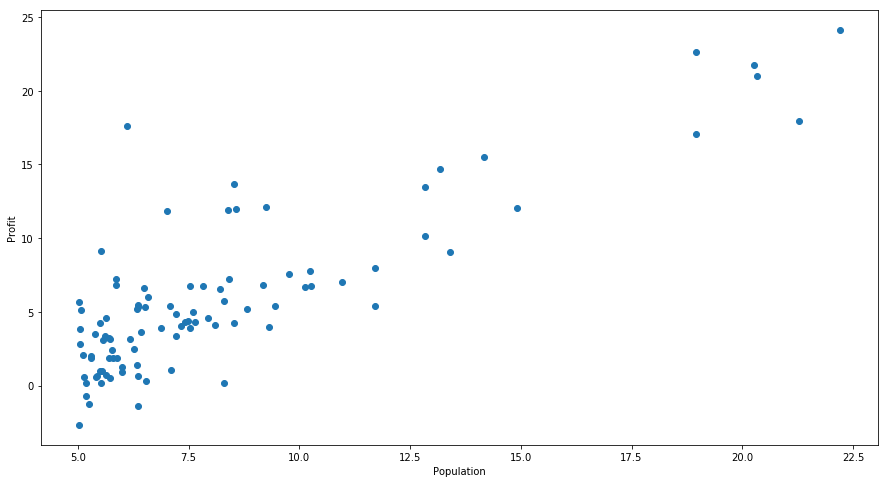

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X, y, 'o')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

### Compute the cost function

In [5]:
def compute_cost(X, y, theta):
    predictions = np.dot(X, theta.T)
    squared_error = np.power((y - predictions), 2)
    J = 1 / (2 * m) * np.sum(squared_error)
    return(J)

In [6]:
# Add Intercept term
X.insert(0, 'Intercept', 1)

In [7]:
# Convert from Pandas DataFrames to NumPy arrays.
X = np.array(X)
y = np.array(y)
y = y.ravel() # work with 1-dim arrays, i.e. (m,) instead of 2-dim, i.e. (m, 1)

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (97, 2)
y shape: (97,)


In [8]:
# Number of training examples
m = X.shape[0]

# Number of features
n = X.shape[1]

In [9]:
# Initialise fitting parameters (weights)
theta = np.zeros(n)

print('theta shape: {}'.format(theta.shape))

theta shape: (2,)


In [10]:
compute_cost(X, y, theta)

32.072733877455676

### Fit the linear regression parameters theta to our data using Gradient Descent

In [11]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = X.shape[0]
    num_params = X.shape[1]
    theta_temp = np.zeros(theta.shape)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        errors = np.dot(X, theta) - y # theta.T would return the same shape
        
        for j in range(num_params):
            delta = 1 / m * np.sum(errors * X[:, j])
            theta_temp[j] = theta_temp[j] - (learning_rate * delta)
            
        theta = theta_temp
        J_history[i] = compute_cost(X, y, theta)
        
        if i % 50 == 0:
            print("At iteration {}, the cost is {}".format(i, J_history[i]))
    return(theta, J_history)

In [12]:
learning_rate = 0.01
num_iters = 1001

In [13]:
theta_optim, grad = gradient_descent(X, y, theta, learning_rate, num_iters)

At iteration 0, the cost is 6.737190464870008
At iteration 50, the cost is 5.673965480401505
At iteration 100, the cost is 5.476362817272741
At iteration 150, the cost is 5.311380876611356
At iteration 200, the cost is 5.173634551165022
At iteration 250, the cost is 5.05862772012701
At iteration 300, the cost is 4.962606493117519
At iteration 350, the cost is 4.88243668100122
At iteration 400, the cost is 4.815501494116686
At iteration 450, the cost is 4.759616128727925
At iteration 500, the cost is 4.712956453749759
At iteration 550, the cost is 4.673999470039924
At iteration 600, the cost is 4.6414735988143185
At iteration 650, the cost is 4.614317176570122
At iteration 700, the cost is 4.591643801766725
At iteration 750, the cost is 4.572713402159867
At iteration 800, the cost is 4.5569080784097515
At iteration 850, the cost is 4.543711935484407
At iteration 900, the cost is 4.532694243543437
At iteration 950, the cost is 4.523495378663532
At iteration 1000, the cost is 4.5158150845

## Multivariate

In [14]:
"""
The file ex1data2.txt contains a training set of housing prices in
Portland, Oregon. The first column is the size of the house
(in square feet), the second column is the number of bedrooms, and
the third column is the price of the house.
"""
PATH_TO_DATA = ''.join([os.getcwd(), '/data/ex1data2.txt'])
df = pd.read_csv(PATH_TO_DATA, names=['Size', 'Bedrooms', 'Price'])

In [15]:
X = df[['Size', 'Bedrooms']]
y = df[['Price']]

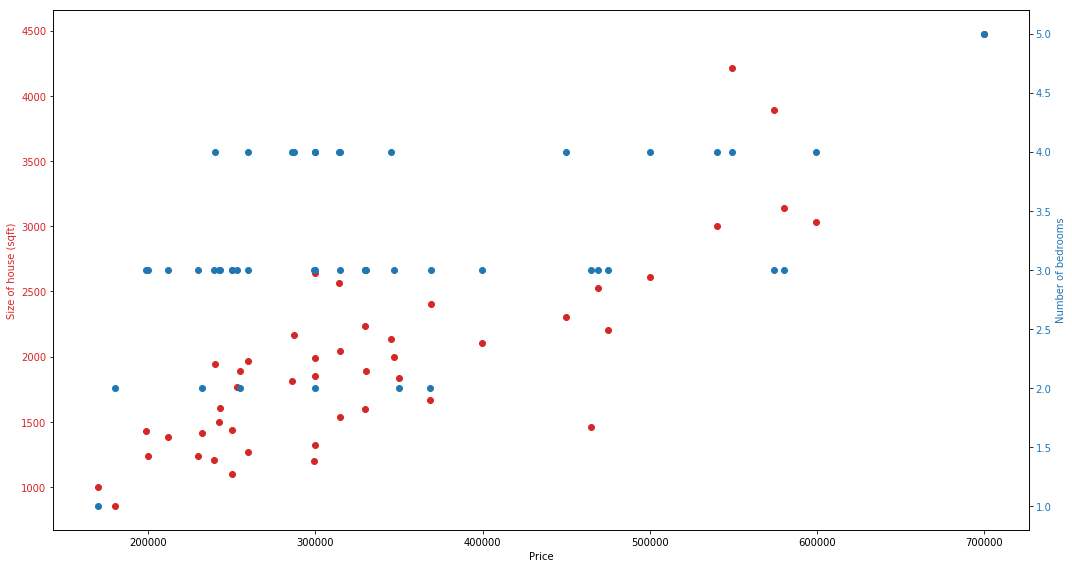

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:red'
ax1.set_xlabel('Price')
ax1.set_ylabel('Size of house (sqft)', color=color)
ax1.plot(y, X['Size'], 'ro', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of bedrooms', color=color)
ax2.plot(y, X['Bedrooms'], 'bo', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [17]:
# Add Intercept term
X.insert(0, 'Intercept', 1)

In [18]:
# Convert from Pandas DataFrames to NumPy arrays.
X = np.array(X)
y = np.array(y)
y = y.ravel()

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (47, 3)
y shape: (47,)


In [19]:
# Number of training examples
m = X.shape[0]

# Number of features
n = X.shape[1]

In [20]:
# Initialise fitting parameters
theta = np.zeros(n)

In [21]:
compute_cost(X, y, theta)

65591548106.45744

In [22]:
# The size of the house and the number of bedrooms have different scales.
# When features differ by orders of magnitude, first performing feature
# scaling can make Gradient Descent converge more quickly.
def feature_normalise(X):
    mu = X.mean()
    std = X.std()
    X = (X - mu) / std
    return(X)

In [23]:
df_normalised = feature_normalise(df)
# df_normalised.head()

In [24]:
X = df_normalised[['Size', 'Bedrooms']]
y = df_normalised[['Price']]

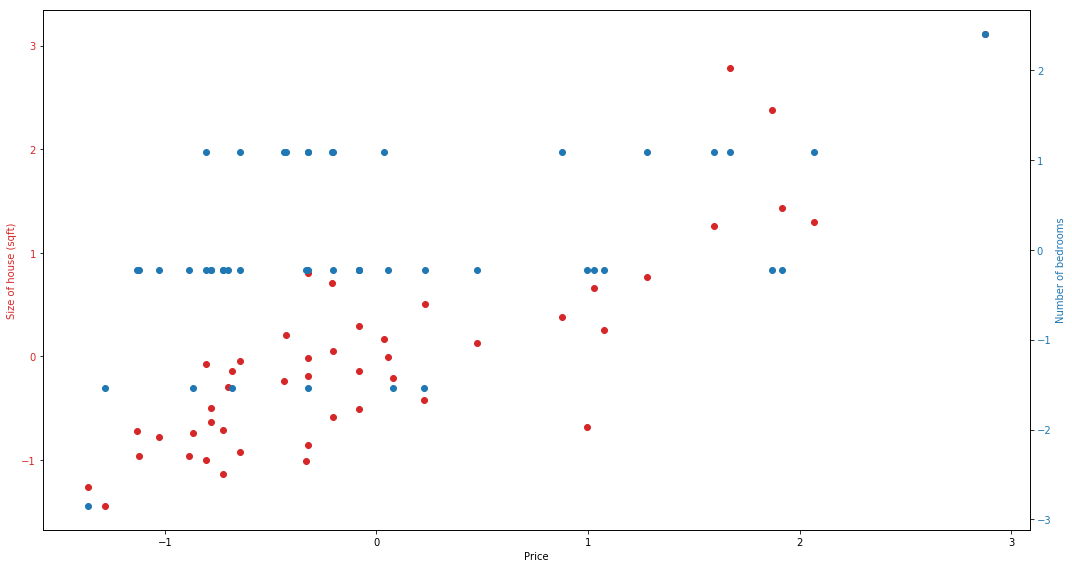

In [25]:
# Visualise data again to make sure that we just scaled it.

fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:red'
ax1.set_xlabel('Price')
ax1.set_ylabel('Size of house (sqft)', color=color)
ax1.plot(y, X['Size'], 'ro', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of bedrooms', color=color)
ax2.plot(y, X['Bedrooms'], 'bo', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [26]:
# Add Intercept term
X.insert(0, 'Intercept', 1)

In [27]:
# Convert from Pandas DataFrames to NumPy arrays.
X = np.array(X)
y = np.array(y)
y = y.ravel()

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (47, 3)
y shape: (47,)


In [28]:
# Number of training examples
m = X.shape[0]

# Number of features
n = X.shape[1]

In [29]:
# Initialise fitting parameters
theta = np.zeros(n)

In [30]:
compute_cost(X, y, theta)

0.4893617021276596

In [31]:
learning_rate = 0.01
num_iters = 501

In [32]:
theta_optim, grad = gradient_descent(X, y, theta, learning_rate, num_iters)

At iteration 0, the cost is 0.4805491041076719
At iteration 50, the cost is 0.2466270514254147
At iteration 100, the cost is 0.18209443801333894
At iteration 150, the cost is 0.15894496577330428
At iteration 200, the cost is 0.1479382495738683
At iteration 250, the cost is 0.14165454023209023
At iteration 300, the cost is 0.1377591345050687
At iteration 350, the cost is 0.13526905125531047
At iteration 400, the cost is 0.1336603777249612
At iteration 450, the cost is 0.1326174317377714
At iteration 500, the cost is 0.1319404652949001


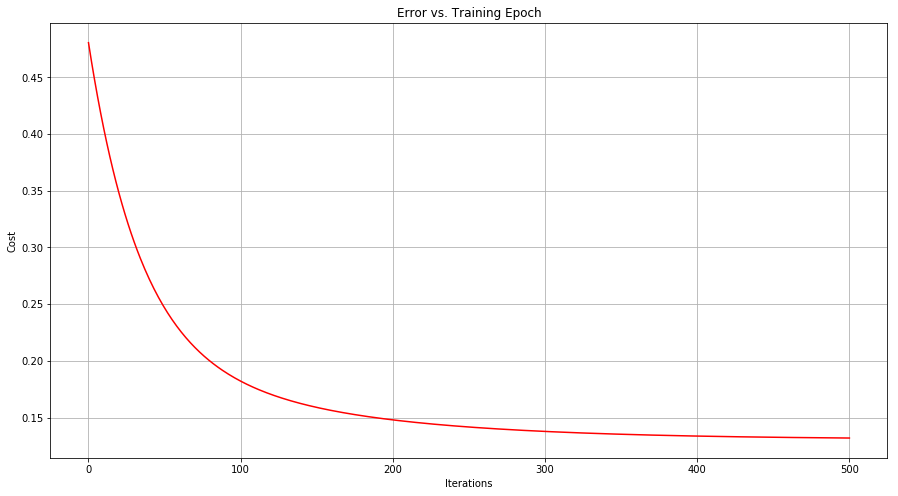

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.arange(num_iters), grad, 'r')
ax.set_title('Error vs. Training Epoch')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.grid()

### Simple example to visualise the cost function

In [34]:
def h(theta, X):
    return(theta * X)

In [35]:
def J(X, y, theta):
    predictions = theta * X
    squared_error = np.power((y - predictions), 2)
    J = 1 / (2 * m) * np.sum(squared_error)
    return(J)

In [36]:
X = np.linspace(1, 3, 3)
X = X.reshape(X.shape[0], 1)
y = X
theta = 1

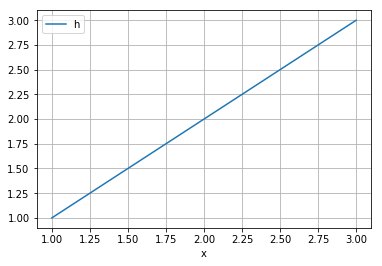

In [37]:
df = pd.DataFrame(data=np.c_[X, h(theta, X)], columns=['x', 'h'])
df.plot(x='x', y='h', grid=True)

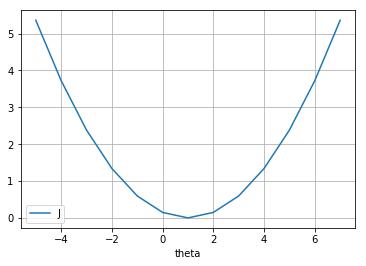

In [38]:
cost = pd.DataFrame([(theta, J(X, y, theta)) for theta in range(-5, 8)], columns=['theta', 'J'])
cost.plot(x='theta', y='J', grid=True)